In [2]:
#Importing Necessary Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
import zipfile
import os
zip_path = '/content/animal_data (2).zip'  # Update if your file has a different name
extract_path = '/content/animal_data (2)'  # Extract to this folder

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Folder successfully extracted!")


Folder successfully extracted!


In [4]:
data_dir = '/content/animal_data (2)/animal_data'  # Path to the extracted folder

In [5]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Display class names
class_name=train_ds.class_names
print(class_name)

Found 1944 files belonging to 15 classes.
Using 1556 files for training.
Found 1944 files belonging to 15 classes.
Using 388 files for validation.
['Bear', 'Bird', 'Cat', 'Cow', 'Deer', 'Dog', 'Dolphin', 'Elephant', 'Giraffe', 'Horse', 'Kangaroo', 'Lion', 'Panda', 'Tiger', 'Zebra']


In [7]:
train_ds = train_ds.map(lambda image, label: (tf.image.resize(image, (img_height, img_width)) / 255.0, label))
test_ds = test_ds.map(lambda image, label: (tf.image.resize(image, (img_height, img_width)) / 255.0, label))

In [8]:
train_images = []
train_labels = []

for image, label in train_ds:
    train_images.extend(image.numpy())  # Convert TensorFlow tensor to NumPy array
    train_labels.extend(label.numpy())

train_images = tf.convert_to_tensor(train_images)
train_labels = tf.convert_to_tensor(train_labels)

In [9]:
test_images = []
test_labels = []

for image, label in test_ds:
    test_images.extend(image.numpy())  # Convert TensorFlow tensor to NumPy array
    test_labels.extend(label.numpy())

test_images = tf.convert_to_tensor(test_images)
test_labels = tf.convert_to_tensor(test_labels)

In [10]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)

(1556, 180, 180, 3)
1556
tf.Tensor([12  8 13 ... 12  1  3], shape=(1556,), dtype=int32)


In [11]:
print(test_images.shape)
print(len(test_labels))

(388, 180, 180, 3)
388


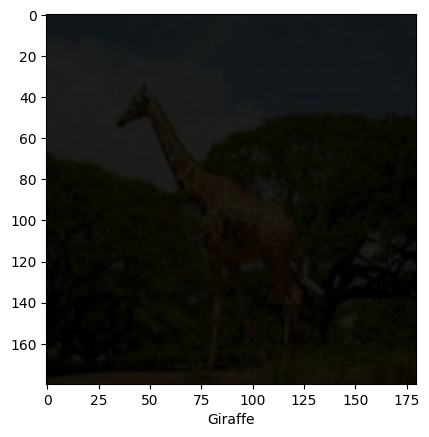

In [12]:
plt.imshow(train_images[1]) #to show the images
plt.xlabel(class_name[train_labels[1]])
plt.grid(False)
plt.show()

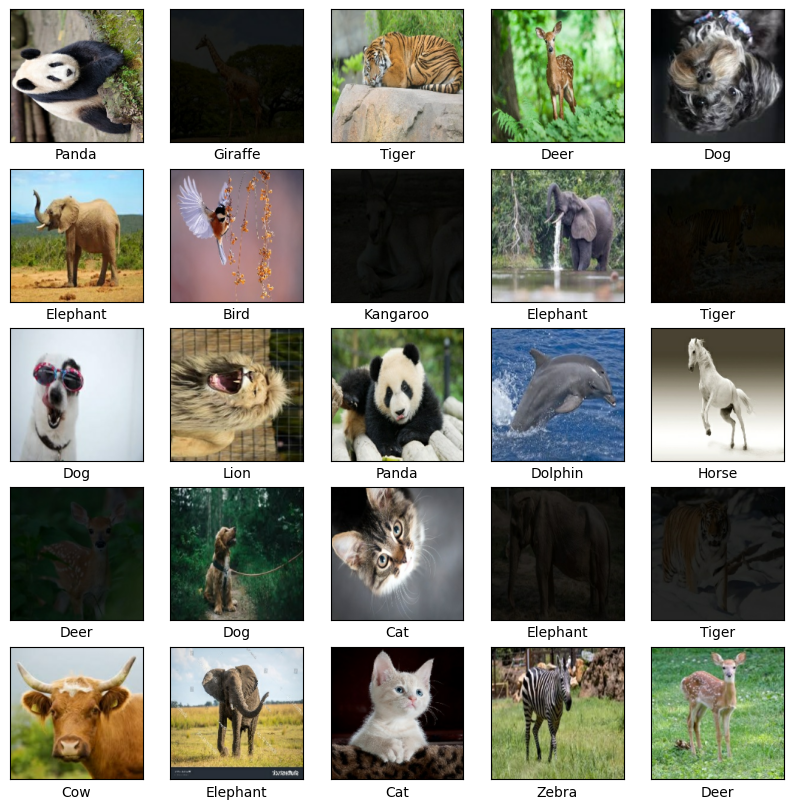

In [13]:
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
   for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])  #to remove the grid numbers on the subplots
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i]) #to show the images
    plt.xlabel(class_name[train_labels[i]])
plt.show()

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)), #First convulution layer
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),                            #Second Convolution layer
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),                                    #Fully Connected Layer
    tf.keras.layers.Dense(15, activation='softmax')                                   #Output layer
    ])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


49/49 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.1251 - loss: 2.6633
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.2747 - loss: 2.3441
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.4125 - loss: 2.0111
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.4950 - loss: 1.7654
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.5922 - loss: 1.5504
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.6830 - loss: 1.2923
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.7041 - loss: 1.1533
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.7557 - loss: 0.9958
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.8269 - loss: 0.8482
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.8596 - loss: 0.7509


In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

13/13 - 6s - 491ms/step - accuracy: 0.6469 - loss: 1.5418

Test accuracy: 0.6469072103500366


In [19]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 511ms/step


In [20]:
predictions[0]
np.argmax(predictions[0])
test_labels[0]

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                100*np.max(predictions_array),
                                class_name[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(15))
  plt.yticks([])
  thisplot = plt.bar(range(15), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

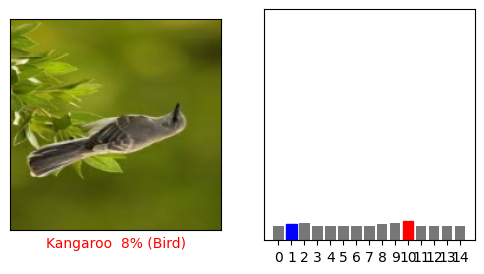

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

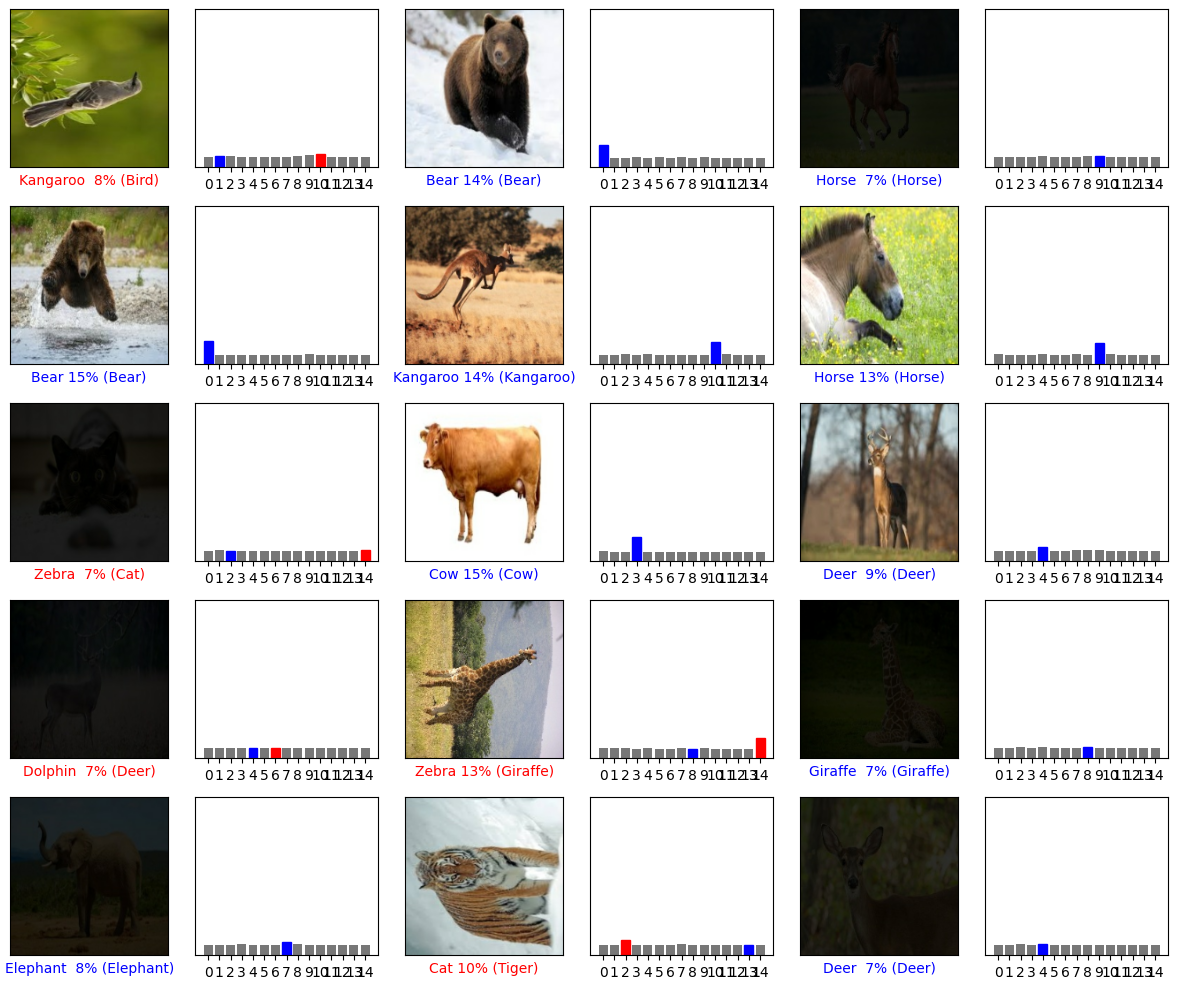

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [24]:
# Grab an image from the test dataset.
a=1
img = test_images[a]
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

In [25]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[[0.13936667 0.06088448 0.06077819 0.06345201 0.06105526 0.06227216
  0.06072722 0.06289629 0.06073149 0.06352935 0.06084516 0.0610977
  0.0608273  0.06079675 0.06073988]]


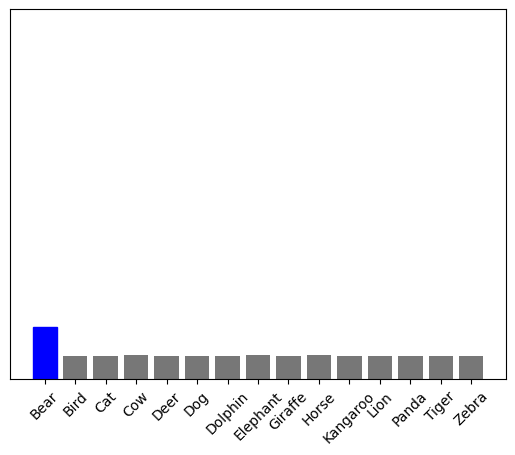

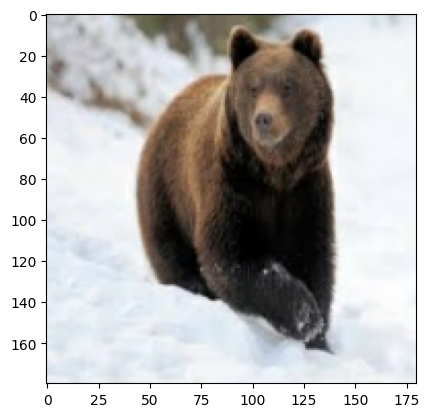

In [26]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(15), class_name, rotation=45)
plt.show()
plt.imshow(test_images[a])
plt.show()